In [1]:
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('crime_data.csv')
df.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.shape

(50, 5)

In [4]:
df=df.rename({'Unnamed: 0':'state'},axis=1)

In [5]:
df.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# standardisation of dataset

In [7]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.iloc[:,1:])

# Hierarchical clustering

<IPython.core.display.Javascript object>

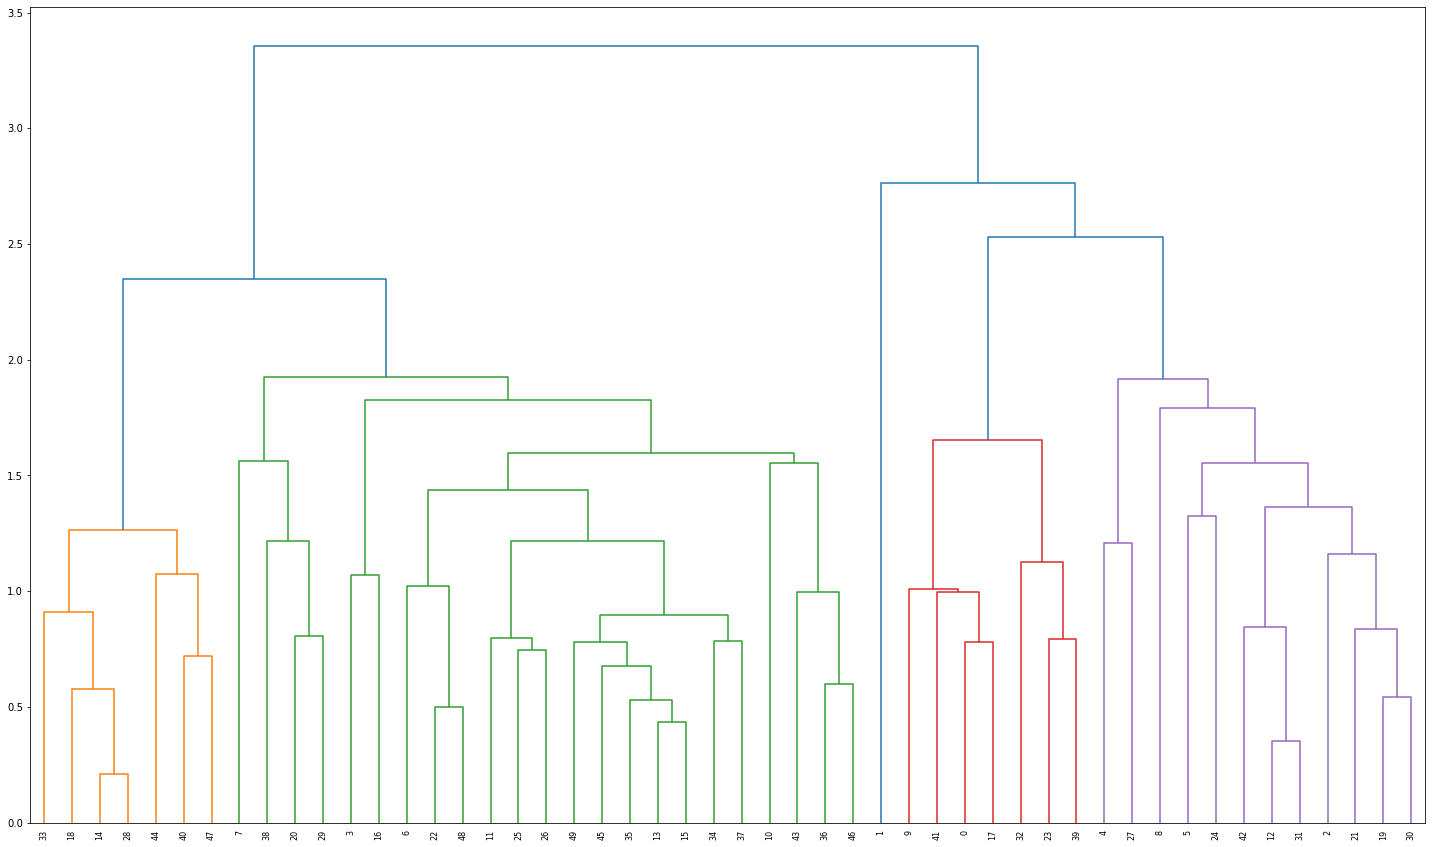

In [8]:
plt.figure(figsize=(25,15))
dendrogram=sch.dendrogram(sch.linkage(df_scaled,method='average'))

In [9]:
ac=AgglomerativeClustering(n_clusters=5,linkage='average',affinity='euclidean')
ac_hie=ac.fit_predict(df_scaled)

In [10]:
cluster_hie=pd.DataFrame(ac_hie,columns=['clusters'])


<IPython.core.display.Javascript object>

In [11]:
cluster_hie.head()

,clusters
0,3
1,2
2,1
3,0
4,1


In [12]:
df['cluster_hie']=cluster_hie

In [13]:
df

,state,Murder,Assault,UrbanPop,Rape,cluster_hie
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


# Kmeans clustering

In [45]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
sil_score = []
cal_haz_score =[]
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score.append(silhouette_score(df_scaled,kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(df_scaled,kmeans.labels_))

C:\Users\OMKAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.31163939712256]

In [47]:
sil_score

[0.4084890326217641,
 0.3095091512791688,
 0.33968891433344395,
 0.30612803169146263,
 0.29910456843899946,
 0.23035904501364113,
 0.2732934287338534,
 0.2518939934580804,
 0.2652233759332704]

In [48]:
cal_haz_score

[43.46199150301377,
 35.18481487211701,
 37.94972059900646,
 33.28658302470653,
 31.26605066475041,
 28.205209929782704,
 28.594705898193535,
 26.214354074691737,
 26.952143948781234]

<IPython.core.display.Javascript object>

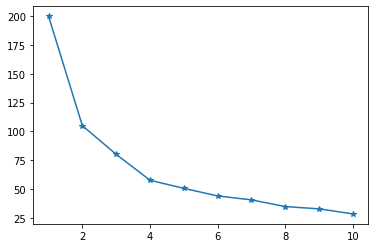

In [15]:
plt.plot(range(1,11),wcss,'*-')

In [16]:
# selecting 5 numbers of cluster
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [17]:
clusters_kmeans=kmeans.labels_
clusters_kmeans

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 2, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [18]:
df['clusters_kmeans']=clusters_kmeans

In [19]:
df

,state,Murder,Assault,UrbanPop,Rape,cluster_hie,clusters_kmeans
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,2,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,3


# DBSCAN clustering

In [20]:
from sklearn.cluster import DBSCAN


In [39]:
dbscan = DBSCAN(eps=0.8,min_samples=3)
dbscan.fit(df_scaled)

DBSCAN(eps=0.8, min_samples=3)

In [40]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1,  0,  0, -1,  0, -1,  1, -1, -1,  0,
        0,  0,  2,  0, -1, -1,  0, -1, -1,  2, -1,  0,  2,  0,  0,  0],
      dtype=int64)

In [41]:
df['clusetrs_dbscan']=dbscan.labels_

In [42]:
df

,state,Murder,Assault,UrbanPop,Rape,cluster_hie,clusters_kmeans,clusetrs_dbscan
0,Alabama,13.2,236,58,21.2,3,3,-1
1,Alaska,10.0,263,48,44.5,2,1,-1
2,Arizona,8.1,294,80,31.0,1,1,-1
3,Arkansas,8.8,190,50,19.5,0,2,-1
4,California,9.0,276,91,40.6,1,1,-1
5,Colorado,7.9,204,78,38.7,1,1,-1
6,Connecticut,3.3,110,77,11.1,0,0,-1
7,Delaware,5.9,238,72,15.8,0,0,-1
8,Florida,15.4,335,80,31.9,1,1,-1
9,Georgia,17.4,211,60,25.8,3,3,-1


1) both hierarchical and kmeans alloted each observations in clusters. while DBSCAN detected some outliers in the dataset. one of the drawback of dbscan is that it clustesr the observation according to some pattern followed by the them. if some points do not follow pattern or if they are not in density reachable from any the point which is in any clusters , they such points will be termed as noise points. all the time, such case is not true. 